## GRIP Task 2

Predicting the percentage of marks that a student is expected to score based upon the number of hours they studied. 

### Import libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('http://bit.ly/w-data') 
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


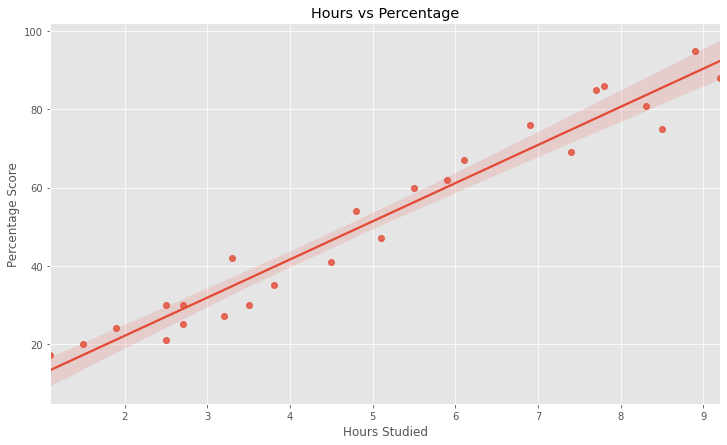

In [4]:
plt.figure(figsize=(12,7))
plt.style.use('ggplot')
sns.regplot(X,y)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

## Splitting the data

We use 80% of the dataset to train the model, and 20% to test the model

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

## Call instances of the Linear Regression model from scikit learn and train the model

In [6]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training set visualization

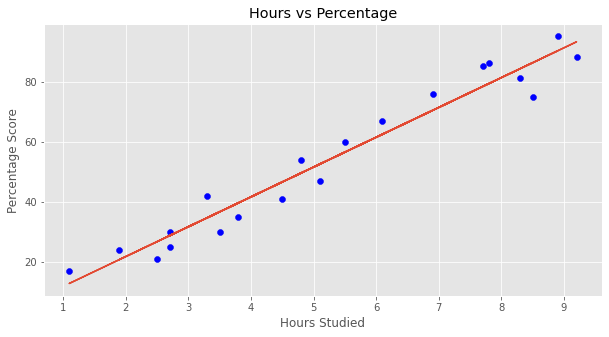

In [7]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, reg.predict(X_train))
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

## Checking accuracy of the model

First, we find the Mean Square Error and the Root Mean Squared Error

In [8]:
y_pred = reg.predict(X_test)

In [9]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975
Root Mean Squared Error: 4.647447612100367


Then, we use k folds cross validation to check the accuracy. Here, we use three folds

In [10]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = reg, X = X_train, y = y_train, cv = 3)
print("Accuracy: {} %".format(accuracy.mean()*100))
print("Standard Deviation: {} %".format(accuracy.std()*100))

Accuracy: 94.28446204315809 %
Standard Deviation: 0.6771370689833804 %


## Model Predicted Values:

In [11]:
h = float(input('Enter number of hours studied: '))
pred=reg.predict([[h]])
print("Predicted Score by the model = {}%".format(pred[0]))

Enter number of hours studied: 9.25
Predicted Score by the model = 93.69173248737535%
